In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from xml.etree import ElementTree
from tqdm import tqdm

In [2]:
base_path = Path("../simulation_data/v4/")

#specialized paths
network_path = base_path / "network"
mobility_path = base_path / "mobility"
disease_path = base_path / "disease"
events_path = base_path / "events"

In [3]:
trees = []
for i in tqdm(range(1, 11)):
    filename = ""
    if i % 10 == i:
        filename = f"day_00{i}.xml"
    else:
        filename = f"day_0{i}.xml"
    trees.append(ElementTree.parse(events_path / filename))


100%|██████████| 10/10 [12:24<00:00, 74.42s/it]


In [4]:
day_events = []
for tree in tqdm(trees):
    root = tree.getroot()
    events = []
    for child in root:
        if child.attrib["type"] == "episimPersonStatus":
            continue
        events.append(child.attrib)
    day_events.append(events)

100%|██████████| 10/10 [03:53<00:00, 23.32s/it]


In [5]:
from collections import defaultdict
cnt = defaultdict(int)

for days in tqdm(day_events):
    
    for event in days:
        cnt[event["type"]] += 1

100%|██████████| 10/10 [02:16<00:00, 13.63s/it]


In [24]:
cnt

defaultdict(int,
            {'actend': 3643270,
             'PersonEntersVehicle': 3032220,
             'PersonLeavesVehicle': 3032210,
             'actstart': 3615620,
             'episimContact': 6039942,
             'episimAlmostContact': 3818469,
             'episimInfection': 210,
             'QuaratineStatusChanged': 48})

In [7]:
events = day_events[0]

timeline = [0]
person = "3327462"

for event in tqdm(events):
    if event["person"] == person:
        timeline.append(event)

100%|██████████| 2314291/2314291 [00:13<00:00, 171141.16it/s]


In [8]:
persons = set()
for day in tqdm(day_events):
    
    for event in day:
        persons.add(event["person"])
        

100%|██████████| 10/10 [02:03<00:00, 12.34s/it]


In [9]:
days_by_person = list()

for d, day in tqdm(enumerate(day_events)):
    daily = defaultdict(list)
    for event in day:
        daily[event["person"]].append(event)
    days_by_person.append(daily)

10it [04:37, 27.77s/it]


In [10]:
event_counter = defaultdict(int)

for day in tqdm(days_by_person):
    
    for person, events in day.items():
        event_counter[len(events)] += 1

100%|██████████| 10/10 [01:06<00:00,  6.67s/it]


In [11]:
number_events, counts = zip(*sorted(event_counter.items()))

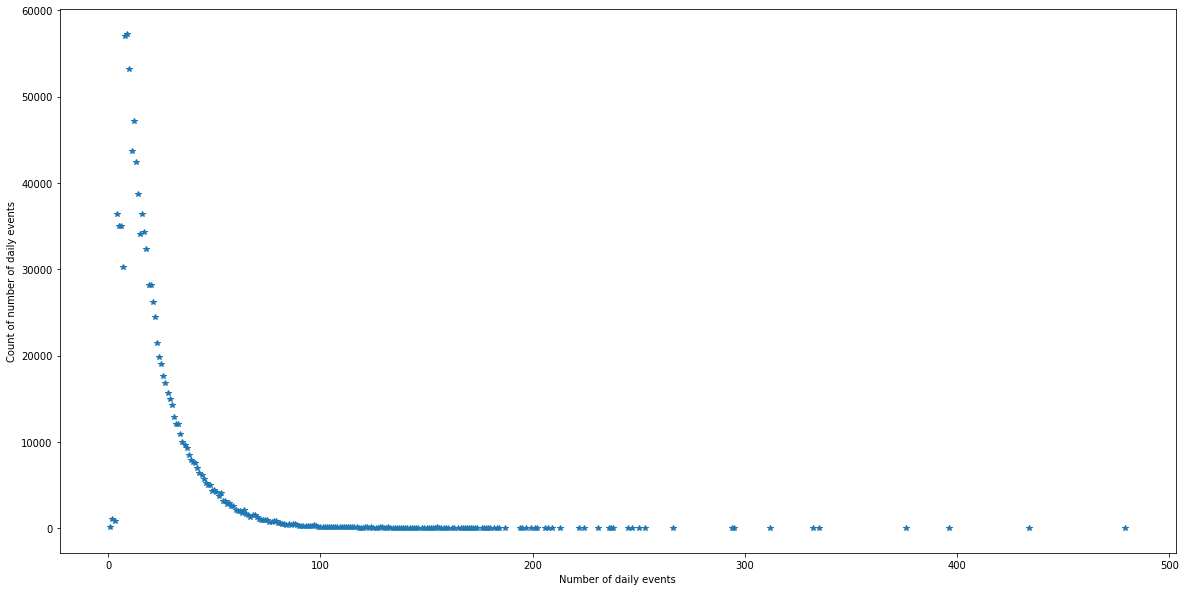

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))

plt.plot(number_events, counts, "*")
plt.xlabel("Number of daily events")
plt.ylabel("Count of number of daily events")
plt.savefig("distribution_of_events.svg")
plt.show()

In [13]:
test_df = pd.DataFrame(None, columns=["Col1", "Col2", "Col3"])

In [21]:
test_df = test_df.append({"Col1": 1, "Col2": 2, "Col3": 3}, ignore_index=True)

In [22]:
test_df

,Col1,Col2,Col3
0,1,2,3


In [25]:
filename = f"day_001.xml"
fullpath = events_path / filename


In [27]:
single_tree = ElementTree.parse(fullpath)

In [29]:
registry = defaultdict(dict)

for child in tqdm(single_tree.getroot()):
    if len(registry) == 8:
        break
    registry[child.attrib["type"]] = child

100%|██████████| 2314301/2314301 [00:08<00:00, 269396.15it/s]


In [9]:
files = []
for i in range(1, 4):
    if i % 10 == i:
        files.append(f"day_00{i}.xml")
    else:
        files.append(f"day_0{i}.xml")
folder = "../simulation_data/v4/events"

In [13]:
import os
c = 0

for file in tqdm(files):
    tree = ElementTree.parse(os.path.join(folder, file))
    
    root = tree.getroot()
    
    for child in root:
        c += 1
    

100%|██████████| 3/3 [02:03<00:00, 41.00s/it]


In [15]:
facility_tree = ElementTree.parse(mobility_path / "output_facilities.xml")

In [28]:
type_of_facilities = set()

root = facility_tree.getroot()
for child in root:
    
    type_of_facilities.add(child.getchildren()[0].attrib["type"])

<ipython-input-28-eb14059a6b5f>:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  type_of_facilities.add(child.getchildren()[0].attrib["type"])


In [29]:
type_of_facilities

{'education', 'home', 'leisure', 'other', 'shop', 'work'}